In [6]:
# Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv 
# dataset. Determine the number of clusters using the elbow method. 

# RFM Analysis:

# Recency (R): How recently a customer has made a purchase.
# Frequency (F): How often a customer makes a purchase.
# Monetary Value (M): The total monetary value of a customer's purchases.
# Log Transformation and Standardization:

# The RFM values are log-transformed and standardized to handle potential skewness and ensure that all variables are on a similar scale. This step is useful for certain statistical techniques that assume normality and when working with algorithms sensitive to feature scaling.
# K-Means Clustering:

# The K-Means algorithm is applied to the standardized log-transformed RFM data to cluster customers into groups based on their similarities in recency, frequency, and monetary value.
# The optimal number of clusters (K) is determined using the elbow method, and in this case, it is set to 5.
# Outcome and Usefulness:

# Customer Segmentation: The primary outcome is the segmentation of customers into distinct clusters based on their RFM characteristics.
# Understanding Customer Behavior: This analysis allows you to understand different segments of customers, such as those who are recent and frequent purchasers with high monetary value versus those who are less active.
# Targeted Marketing: Once customers are segmented, targeted marketing strategies can be developed for each cluster. For example, high-value and frequent customers might receive special offers or loyalty rewards, while efforts can be made to re-engage less active segments.
# Optimizing Resources: By understanding customer segments, businesses can allocate resources more effectively, focusing on strategies that are likely to be most impactful for each group.


import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv("sales_data_sample.csv", encoding="unicode_escape")

to_drop = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'POSTALCODE', 'PHONE']
df = df.drop(to_drop, axis=1)
# df.columns

df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

# This line calculates the snapshot date, which is one day after the maximum order date in the dataset. The snapshot date is used to calculate the recency of each customer.
snapshot=df["ORDERDATE"].max()+dt.timedelta(days=1)

#RFM (Recency, Frequency, Monetary)
# The code groups the DataFrame (df) by the 'CUSTOMERNAME' column and aggregates the data for each customer using the agg function.
# It calculates the recency by subtracting the maximum order date from the snapshot date, counts the number of orders for each customer ('ORDERNUMBER'), and sums the total sales ('SALES').

df_rfm=df.groupby(df["CUSTOMERNAME"]).agg(
    {
        'ORDERDATE' : lambda x : (snapshot-x.max()).days, #Recency
        'ORDERNUMBER' : 'count', #Frequency
        'SALES' : 'sum' #Monetary
    }
)

# The code renames the columns to more meaningful names:
# 'ORDERDATE' is renamed to 'Recency'.
# 'ORDERNUMBER' is renamed to 'Frequency'.
# 'SALES' is renamed to 'MonetaryValue'.
# The inplace=True parameter ensures that the changes are applied to the DataFrame df_rfm in place.

df_rfm.rename(columns={
    'ORDERDATE' : 'Recency',
    'ORDERNUMBER' : 'Frequency',
    'SALES' : 'MonetaryValue'
},inplace=True)

# After executing this code, df_rfm will contain a summary of RFM values for each customer, including their recency, frequency, and monetary value based on the provided dataset. The dataset is grouped by customer, and these aggregated values can be used for further analysis, such as customer segmentation.

# df_rfm.head()

# The code uses pd.qcut to categorize the continuous variables 'Recency,' 'Frequency,' and 'MonetaryValue' into quartiles (four bins).
# 'Recency' is labeled in reverse order (higher values indicate lower recency), and 'Frequency' and 'MonetaryValue' are labeled normally.
# The quartiles are assigned to new columns 'R,' 'F,' and 'M' in the DataFrame df_rfm.
df_rfm["R"] = pd.qcut(df_rfm["Recency"], q = 4, labels=range(4,0,-1))
df_rfm["F"] = pd.qcut(df_rfm["Frequency"], q = 4, labels=range(1,5))
df_rfm["M"] = pd.qcut(df_rfm["MonetaryValue"], q = 4, labels=range(1,5))

# The code calculates the RFM score for each customer by summing the values in the 'R,' 'F,' and 'M' columns.
# The resulting RFM scores provide a consolidated metric to measure customer engagement.
df_rfm["RFM_Score"] = df_rfm[["R", "F", "M"]].sum(axis = 1)
df_rfm.head()



,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10
Alpha Cognac,65,20,70488.44,4,2,2,8
Amica Models & Co.,265,26,94117.26,1,2,3,6
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11
Atelier graphique,188,7,24179.96,2,1,1,4


c:\Users\Samarth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Samarth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Samarth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Samarth\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

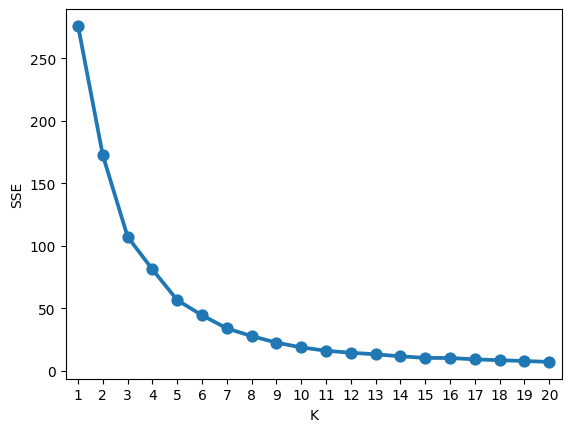

c:\Users\Samarth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Recency,Frequency,MonetaryValue,cluster
CUSTOMERNAME,,,,
"AV Stores, Co.",196,51,157807.81,1
Alpha Cognac,65,20,70488.44,2
Amica Models & Co.,265,26,94117.26,2
"Anna's Decorations, Ltd",84,46,153996.13,1
Atelier graphique,188,7,24179.96,0


In [7]:

# The code creates a DataFrame df_orig containing the original RFM values.
# It then performs a log transformation on the original RFM values to handle potential skewness, creating a new DataFrame df_log.
df_orig = df_rfm[['Recency', 'Frequency', 'MonetaryValue']]
df_orig.head()

df_log=np.log(df_orig)
df_log.head()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_log)
normalized_df = scaler.transform(df_log)
normalized_df = pd.DataFrame(normalized_df)
normalized_df.head()

from sklearn.cluster import KMeans
sse = {} #Sum of Squared Errors (SSE) 

# For each K, a K-Means model (km) is created and fitted to the standardized log-transformed RFM data (normalized_df).
# The SSE for each K is computed and stored in the sse dictionary.
for k in range(1, 21):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(normalized_df)
    sse[k] = km.inertia_



# Plot SSE vs. K to Determine the Elbow Point:
# Matplotlib and Seaborn are used to create a point plot showing SSE values for different values of K.
# The plot is used to identify the "elbow point," which is often a point where the SSE starts to decrease at a slower rate. This point can be a good indication of the optimal number of clusters.
import matplotlib.pyplot as plt
import seaborn as sns
plt.xlabel("K")
plt.ylabel("SSE")
sns.pointplot(x=list(sse.keys()), y = list(sse.values()))
plt.show()

# Perform K-Means Clustering with Chosen K:
# Based on the analysis of the SSE plot, a specific value of K (in this case, 5) is chosen.
# A K-Means model (kmeans) is created with the chosen K and fitted to the standardized log-transformed RFM data.
# The cluster labels are obtained using kmeans.labels_.
# A new DataFrame ans is created by adding a new column 'cluster' to the original RFM DataFrame (df_orig) with the assigned cluster labels.

kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(normalized_df)
labels = kmeans.labels_
ans = df_orig.assign(cluster=labels)
ans.head()
# Based on the analysis of the SSE plot, a specific value of K (in this case, 5) is chosen.
# A K-Means model (kmeans) is created with the chosen K and fitted to the standardized log-transformed RFM data.
# The cluster labels are obtained using kmeans.labels_.
# A new DataFrame ans is created by adding a new column 'cluster' to the original RFM DataFrame (df_orig) with the assigned cluster labels.
